In [2]:
%matplotlib inline

from generate_greedy_training_set import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.pyplot as plt
import numpy as np
import scipy



/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


You do not have pyseobnr installed


/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/media/suzanne/026e7495-c318-4ea6-965f-eac8ffddc6af/suzanne/Python_scripts/SurrogateModel_3PN_eccentric/phenomxpy/my_project/generate_PhenomTE.py:149: UserWarning: t_min is larger than parts of the specified time-domain, resulting in unphysical waveforms. Either use the truncate_tmin=True setting to automatically truncate to physical start of the time-domain or adjust the time-array manually to start at higher values.
  warnings.warn(self.colored_text(
/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/polyrat/arnoldi.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in 

NEW TIME-DOMAIN after truncate at tmin (in geometric units): [-12697, 0] M
NEW TIME-DOMAIN after truncate at ISCO (in geometric units): [-13535, -912] M
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_compute_additional_orbits', '_get_phase_bounds', '_get_reference_bounds', '_get_segment_indices', '_plot_debug_segment', '_update_waveform_data_segment', 'amp_gw', 'amp_gw_merger', 'amp_gw_zeroecc', 'amp_gw_zeroecc_interp', 'apocenters_location', 'available_averaging_methods', 'available_omega_gw_extrema_interpolation_methods', 'check_and_raise_zeroecc_data_not_found', 'check_extrema_separation', 'check_if_dropped_too_many_extrema', 'check_if_first_derivative_is_not_strictly_monotonic', 'check_i

/media/suzanne/026e7495-c318-4ea6-965f-eac8ffddc6af/suzanne/Python_scripts/SurrogateModel_3PN_eccentric/phenomxpy/my_project/generate_PhenomTE.py:149: UserWarning: t_min is larger than parts of the specified time-domain, resulting in unphysical waveforms. Either use the truncate_tmin=True setting to automatically truncate to physical start of the time-domain or adjust the time-array manually to start at higher values.
  warnings.warn(self.colored_text(


Generated residual parameterspace dataset for phase  10  waveforms
Figure is saved in Images/Residuals/Residuals_eccentric_evolv_phase___M=60_ecc_list=[0.0_0.3_N=10]_f_lower=10_f_ref=20.png
Figure is saved in Images/Residuals/Residuals_time_evolv_phase___M=60_ecc_list=[0.0_0.3_N=10]_f_lower=10_f_ref=20.png
[Errno 2] No such file or directory: 'Straindata/Residuals/residuals_amplitude_f_lower=10_f_ref=20_e=[0.0_0.3_N=10].npz'
Loaded polarisations
Generated residual parameterspace dataset for amplitude  10  waveforms
Figure is saved in Images/Residuals/Residuals_eccentric_evolv_amplitude___M=60_ecc_list=[0.0_0.3_N=10]_f_lower=10_f_ref=20.png
Figure is saved in Images/Residuals/Residuals_time_evolv_amplitude___M=60_ecc_list=[0.0_0.3_N=10]_f_lower=10_f_ref=20.png


# Eccentric evolution ET vs LIGO


In [3]:
sampling_frequency = 4096  # or 4096
duration = 6  # seconds
total_mass = 60  # in solar masses

time_array_10 = np.linspace(-duration, 0, int(sampling_frequency * duration))  # time in seconds
time_array_10 = SecondtoMass(time_array_10, total_mass)

duration = 3000  # seconds
time_array_1 = np.linspace(-duration, 0, int(sampling_frequency * duration))  # time in seconds
time_array_1 = SecondtoMass(time_array_1, total_mass)


f_ref = 20  # in Hz
eccentricity = 0.01


In [4]:
# --- Eccentric waveform ET ---
si_1 = phenomt.PhenomTE(
            mode=[2,2],
            times=time_array_1,
            eccentricity=eccentricity,  
            total_mass=total_mass, # Used as reference total_mass to calculate geometric frequency during the waveform generation.           
            f_ref=f_ref,                   
            f_lower=1)

si_1.compute_polarizations(times=time_array_1)

# --- Circular waveform ET ---
si_1_circ = phenomt.PhenomTE(
            mode=[2,2],
            times=time_array_1,  
            total_mass=total_mass, # Used as reference total_mass to calculate geometric frequency during the waveform generation.           
            f_ref=f_ref,                   
            f_lower=1)

si_1_circ.compute_polarizations(times=time_array_1)

# --- Eccentric waveform LIGO ---
si_10 = phenomt.PhenomTE(
            mode=[2,2], 
            times=time_array_10,
            eccentricity=eccentricity,  
            total_mass=total_mass, # Used as reference total_mass to calculate geometric frequency during the waveform generation.           
            f_ref=f_ref,                   
            f_lower=10)

si_10.compute_polarizations(times=time_array_10)

# --- Circular waveform LIGO ---
si_10_circ = phenomt.PhenomTE(
            mode=[2,2],
            times=time_array_10,
            total_mass=total_mass, # Used as reference total_mass to calculate geometric frequency during the waveform generation.           
            f_ref=f_ref,
            f_lower=10)

si_10_circ.compute_polarizations(times=time_array_10)


(array([ 0.03680357,  0.03710753,  0.03740278, ..., -0.15723756,
        -0.20531323, -0.23707015], shape=(24576,)),
 array([-0.02009704, -0.019531  , -0.01896035, ...,  0.1914463 ,
         0.1395201 ,  0.07417596], shape=(24576,)))

/tmp/ipykernel_211422/2433410937.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


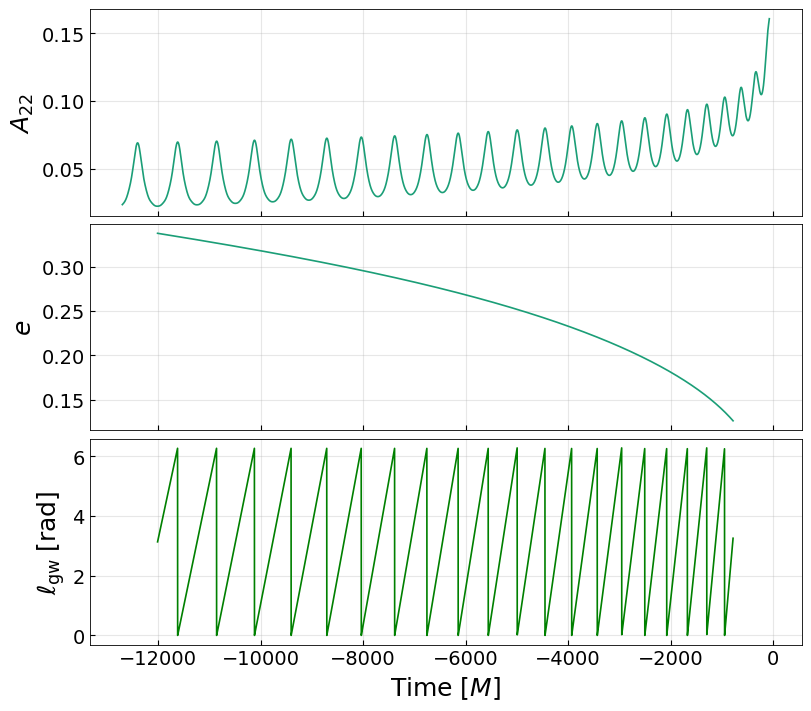

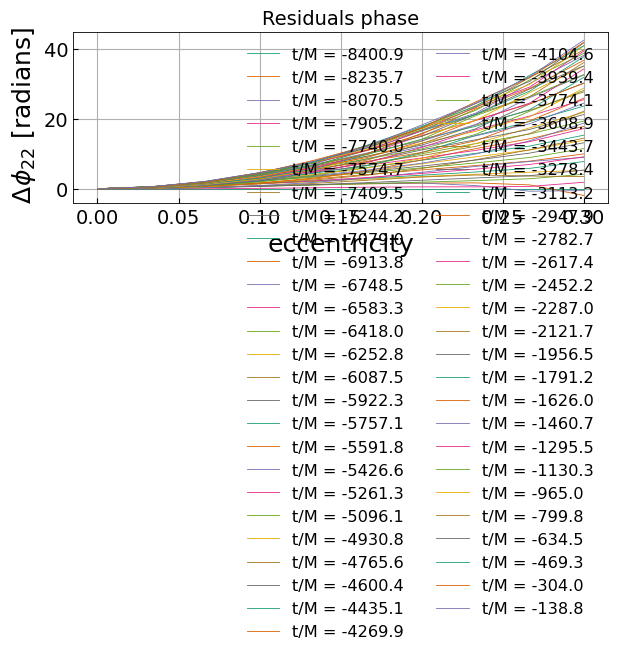

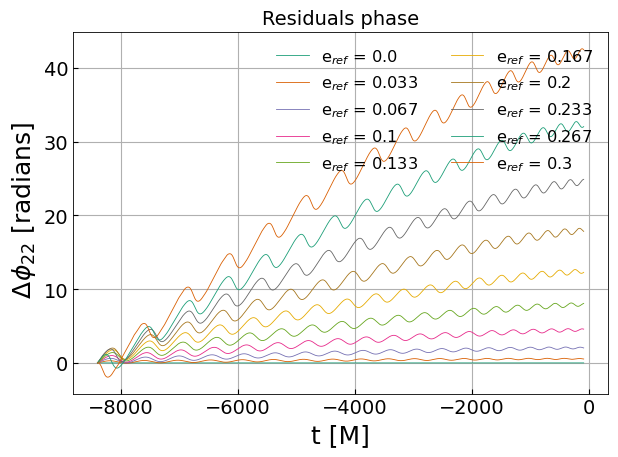

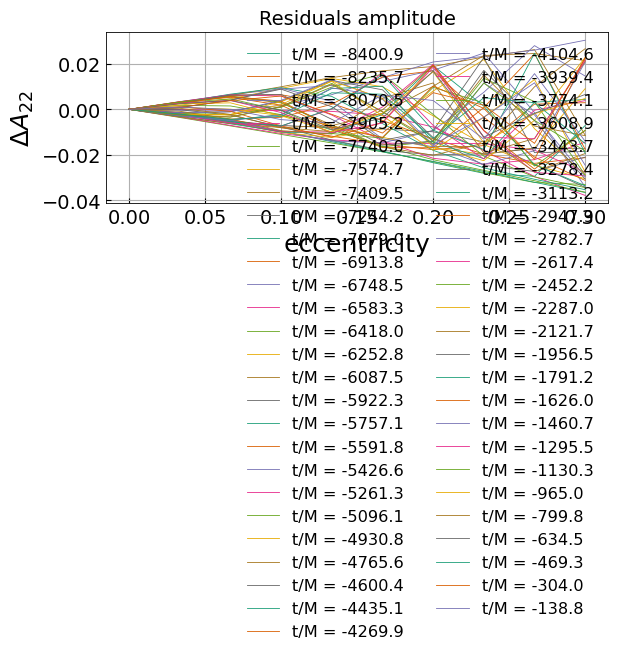

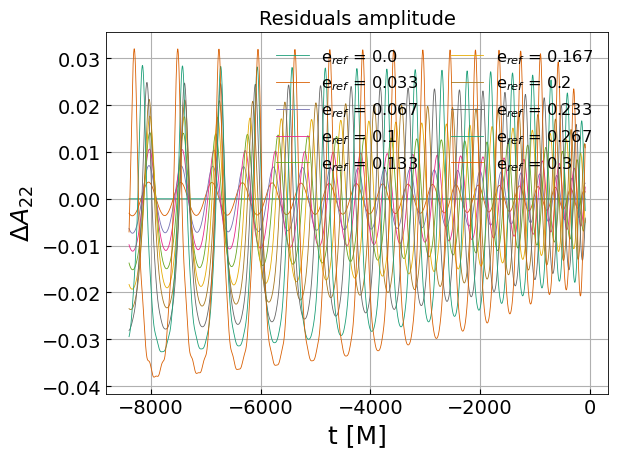

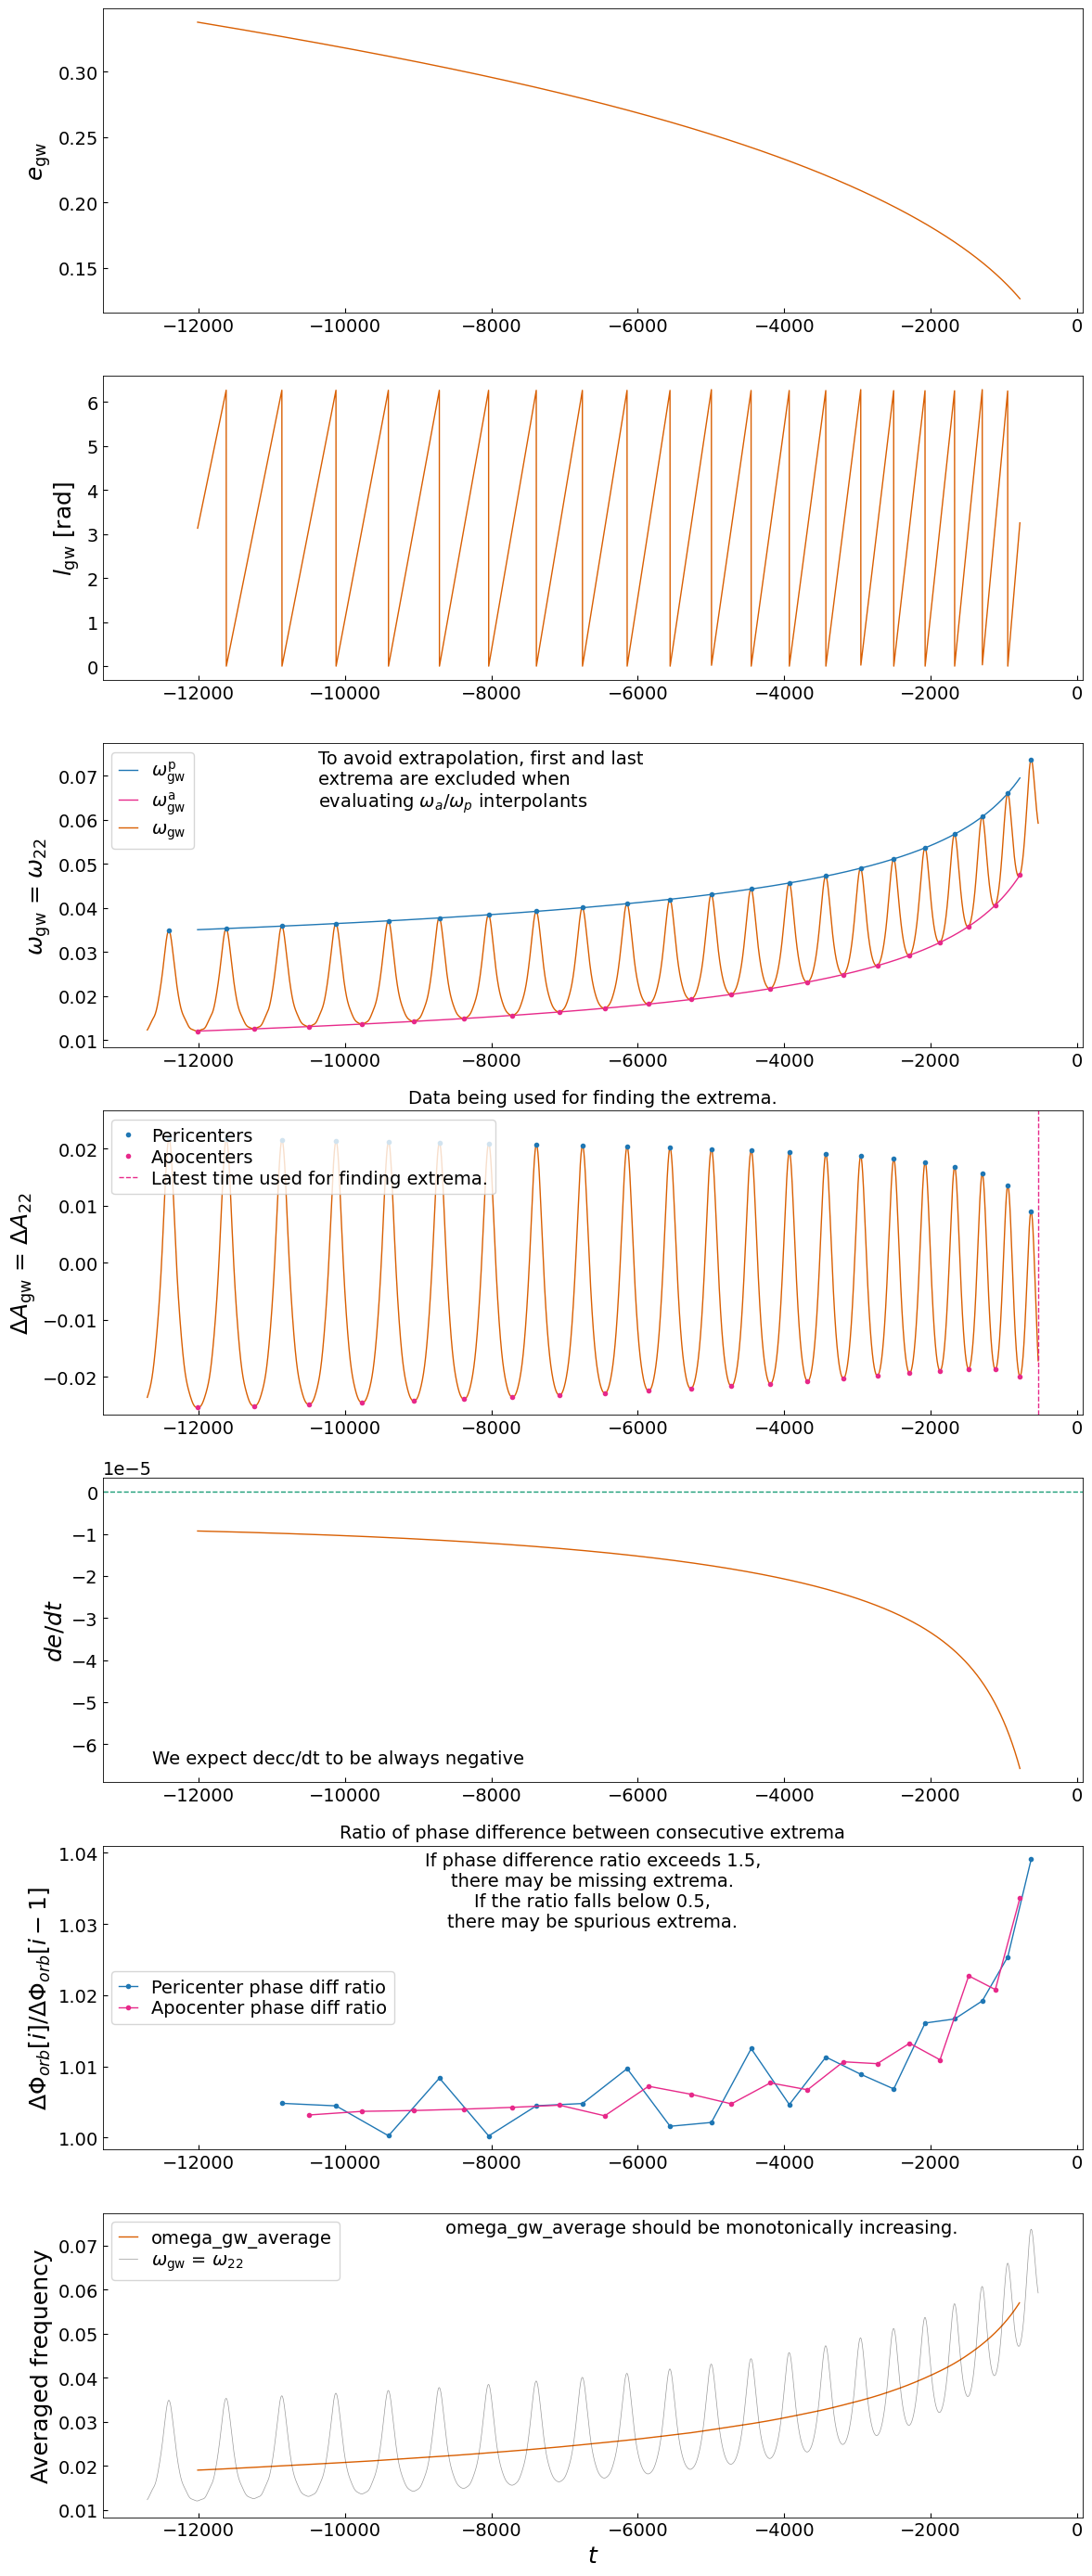

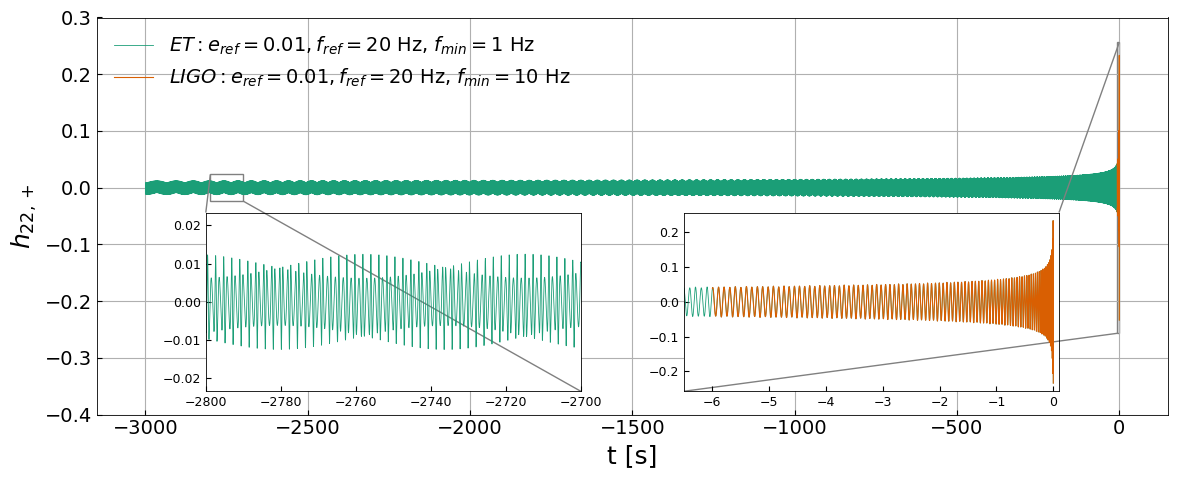

ERROR:tornado.application:Uncaught exception GET /2/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8988', method='GET', uri='/2/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/tornado/websocket.py", line 965, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/matplotlib/backends/backend_webagg.py", line 136, in open
    self.manager.add_web_socket(self)
AttributeError: 'NoneType' object has no attribute 'add_web_socket'


In [ ]:
%matplotlib inline

t1  = MasstoSecond(time_array_1, total_mass)
t10 = MasstoSecond(time_array_10, total_mass)


fig, ax = plt.subplots(figsize=(12, 5))

# ---------- Main plot ----------
ax.plot(t1, si_1.hp,
        label='$ET: e_{ref}=0.01, f_{ref}=20$ Hz, $f_{min}=1$ Hz', linewidth=0.6)

ax.plot(t10, si_10.hp,
        label='$LIGO: e_{ref}=0.01, f_{ref}=20$ Hz, $f_{min}=10$ Hz', linewidth=0.8)

ax.legend(loc='upper left')
ax.set_ylim(-0.4, 0.3)
ax.set_xlabel('t [s]')
ax.set_ylabel('$h_{22,+}$')
ax.grid(True)

# =========================================================
# Inset 1: Early inspiral (long before merger)
# =========================================================
axins1 = inset_axes(
    ax,
    width="35%",
    height="45%",
    loc="lower left",
    bbox_to_anchor=(0.08, 0.0, 1, 1),  # <-- shift right
    bbox_transform=ax.transAxes,
    borderpad=1.2
)


axins1.plot(t1, si_1.hp, linewidth=0.6)
axins1.plot(t10, si_10.hp, linewidth=0.8)

axins1.set_xlim(-2800.0, -2700.0)
axins1.set_ylim(0.1*np.min(si_1.hp), 0.1*np.max(si_1.hp))
axins1.tick_params(axis='both', labelsize=9, direction='in')

mark_inset(ax, axins1, loc1=2, loc2=4, fc="none", ec="0.5")

# =========================================================
# Inset 2: Near merger
# =========================================================
axins2 = inset_axes(
    ax,
    width="35%",
    height="45%",
    loc="lower right",
    bbox_to_anchor=(-0.08, 0.0, 1, 1),  # <-- shift right
    bbox_transform=ax.transAxes,
    borderpad=1.2
)


axins2.plot(t1, si_1.hp, linewidth=0.6)
axins2.plot(t10, si_10.hp, linewidth=0.8)

axins2.set_xlim(-6.5, 0.1)
axins2.set_ylim(1.1*np.min(si_10.hp), 1.1*np.max(si_10.hp))
axins2.tick_params(axis='both', labelsize=9, direction='in')

mark_inset(ax, axins2, loc1=1, loc2=3, fc="none", ec="0.5")

plt.tight_layout()
plt.show()


/tmp/ipykernel_211422/3455688127.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


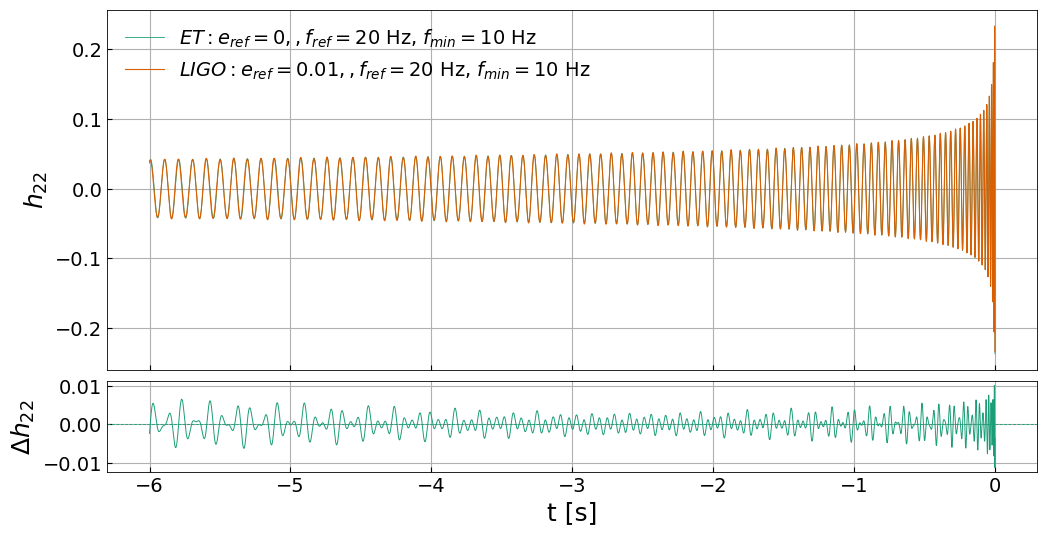

ERROR:tornado.application:Uncaught exception GET /3/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8988', method='GET', uri='/3/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/tornado/websocket.py", line 965, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/matplotlib/backends/backend_webagg.py", line 136, in open
    self.manager.add_web_socket(self)
AttributeError: 'NoneType' object has no attribute 'add_web_socket'


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

diff = si_10_circ.hp - si_10.hp

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 1, height_ratios=[4, 1], hspace=0.05)

# --- Main plot ---
ax = fig.add_subplot(gs[0])
ax.plot(t10, si_10_circ.hp,
        label='$ET: e_{ref}=0, , f_{ref}=20$ Hz, $f_{min}=10$ Hz', linewidth=0.6)

ax.plot(t10, si_10.hp,
        label='$LIGO: e_{ref}=0.01, , f_{ref}=20$ Hz, $f_{min}=10$ Hz', linewidth=0.8)

ax.legend(loc='upper left')
ax.set_ylabel('$h_{22}$')
ax.grid(True)

# --- Difference plot ---
ax_diff = fig.add_subplot(gs[1], sharex=ax)
ax_diff.plot(t10, diff, linewidth=0.7)
ax_diff.axhline(0, linestyle='--', linewidth=0.6)

ax_diff.set_xlabel('t [s]')
ax_diff.set_ylabel(r'$\Delta h_{22}$')
ax_diff.grid(True)

# Hide x tick labels on top plot
plt.setp(ax.get_xticklabels(), visible=False)

plt.tight_layout()
plt.show()


/tmp/ipykernel_211422/3075094341.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


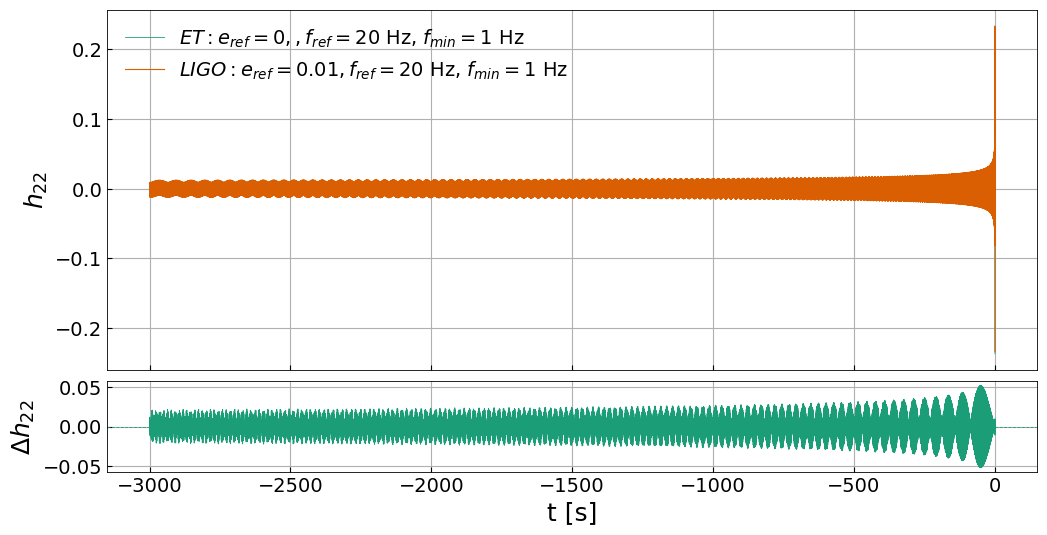

ERROR:tornado.application:Uncaught exception GET /4/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8988', method='GET', uri='/4/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/tornado/websocket.py", line 965, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/matplotlib/backends/backend_webagg.py", line 136, in open
    self.manager.add_web_socket(self)
AttributeError: 'NoneType' object has no attribute 'add_web_socket'


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.close('all')

diff = si_1_circ.hp - si_1.hp

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 1, height_ratios=[4, 1], hspace=0.05)

# --- Main plot ---
ax = fig.add_subplot(gs[0])
ax.plot(t1, si_1_circ.hp,
        label='$ET: e_{ref}=0, , f_{ref}=20$ Hz, $f_{min}=1$ Hz', linewidth=0.6)

ax.plot(t1, si_1.hp,
        label='$LIGO: e_{ref}=0.01, f_{ref}=20$ Hz, $f_{min}=1$ Hz', linewidth=0.8)
ax.legend(loc='upper left')
ax.set_ylabel('$h_{22}$')
ax.grid(True)

# --- Difference plot ---
ax_diff = fig.add_subplot(gs[1], sharex=ax)
ax_diff.plot(t1, diff, linewidth=0.7)
ax_diff.axhline(0, linestyle='--', linewidth=0.6)

ax_diff.set_xlabel('t [s]')
ax_diff.set_ylabel(r'$\Delta h_{22}$')
ax_diff.grid(True)

# Hide x tick labels on top plot
plt.setp(ax.get_xticklabels(), visible=False)

plt.tight_layout()
plt.show()


# Preprocessing of the dataset

Preprocessing is done by altering the data in the following way:
- All mergers are calibrated to happen at t=0
- The waveforms are all in geometric units to remove the total mass dimension. This is easily done because the strain is only dependent on total_mass by factorization fo a scalar. 
- Make sure all waveform lengths are equal. This is done by taking the shortest waveform and cutting this from *10Hz* to *f_ISCO*.
    Note: The effective ISCO frequency is higher for eccentric binaries compared to circular ones, so taking the f_ISCO is physically still accurate because it cuts the waveform short before PN breaks down. 
- The waveform gets cut up into a dataset for the waveform amplitude and phase seperately. This is done to emphasize the complex underlaying eccentric patterns.
- The constant circular underlying waveform gets subtracted from both phase and amplitude to amplify the deviations. This will create two datasets with phase and amplitude residuals.

### From SI units to geometric waveforms
To calculate the amplitude:
$$A(t) = \big| h_+(t) - i\, h_\times(t) \big|$$

For the accumulated phase:
$$\phi(t) =  \arctan2\big(h_\times(t),\, h_+(t)\big)$$

To go from SI units to geometric units:
$$ M_\odot^{(\text{time})}
= \frac{G\,M_\odot}{c^3} = 4.925490947641267 \times 10^{-6}\ \text{s} $$

$$ M_\odot^{(\text{length})}
= \frac{G\,M_\odot}{c^2}
= 1.4766250380501247 \times 10^{3}\ \text{m} $$

$$ M_\text{geom} = M_\text{SI} \times M_\odot^{(\text{time})}$$

For the distance in $\text{Mpc}$:

$$D_\text{geom} = D_\text{Mpc} \cdot 10^6\ \cdot PC_{SI} \cdot (M_\odot^{(\text{time})} / M_\odot^{(\text{length})}) $$
for which $PC_{SI}$ is 1 parsec in meters.

$$ h_\text{geom} = M_\text{geom} / D_\text{geom} $$



### Calculation of f_ISCO
This is the standard ISCO frequency for a non-spinning, circular Schwarzschild black hole binary in geometric units (\(G = c = 1\)):

$M f_\text{ISCO} = \frac{1}{6^{3/2} \pi} \approx 0.021$

where:

- $M$ is the total mass of the binary,
- $f_\text{ISCO}$ is the gravitational-wave frequency at the innermost stable *circular* orbit (ISCO),
- The factor 6 comes from the ISCO radius in Schwarzschild coordinates $r_\text{ISCO} = 6M$,
- The exponent (3/2) comes from Kepler's law: $\Omega_\text{ISCO} = \sqrt{M/r_\text{ISCO}^3}$,
- Division by $\pi$ converts the angular frequency \(\Omega\) to ordinary frequency \(f\).


### Phase and amplitude residuals
Residuals are taken so all values are positive for convenience
$$ \Delta \phi(t) = \phi_{circ}(t) - \phi_{ecc}(t)$$
$$ \Delta A(t) = A_{ecc}(t) - A_{circ}(t)$$



[Errno 2] No such file or directory: 'Straindata/Residuals/residuals_phase_f_lower=10_f_ref=20_e=[0.0_0.3_N=200].npz'
NEW TIME-DOMAIN after truncate at tmin (in geometric units): [-8400, 0] M
NEW TIME-DOMAIN after truncate at ISCO (in geometric units): [-13535, -5218] M
Generated residual parameterspace dataset for phase  200  waveforms
[Errno 2] No such file or directory: 'Straindata/Residuals/residuals_amplitude_f_lower=10_f_ref=20_e=[0.0_0.3_N=200].npz'
Loaded polarisations
Generated residual parameterspace dataset for amplitude  200  waveforms


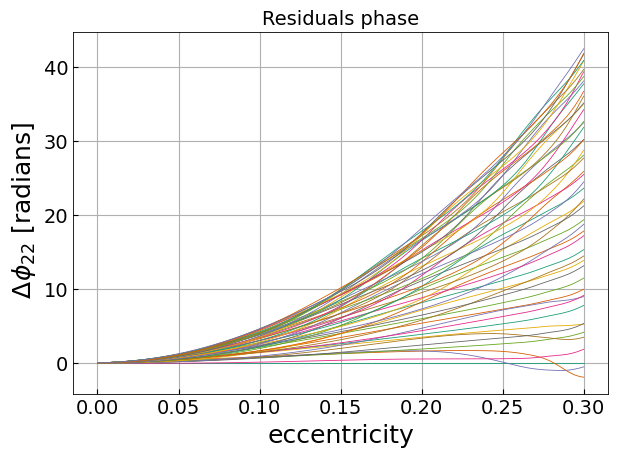

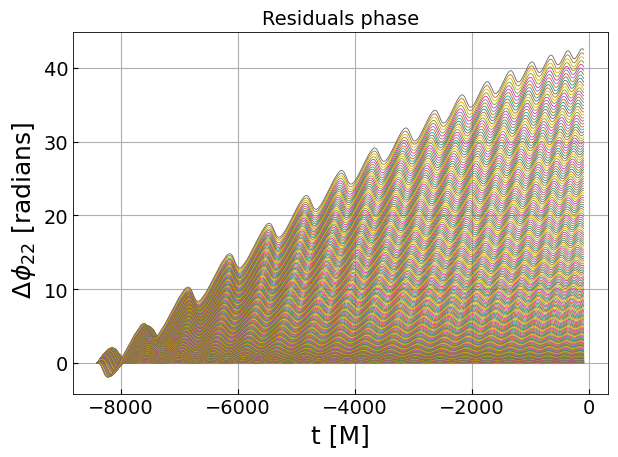

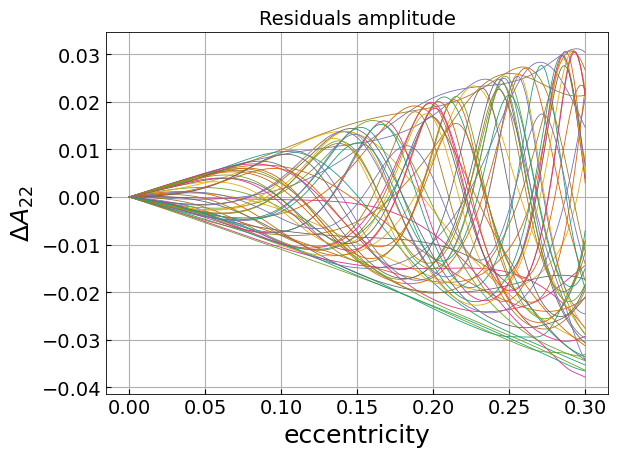

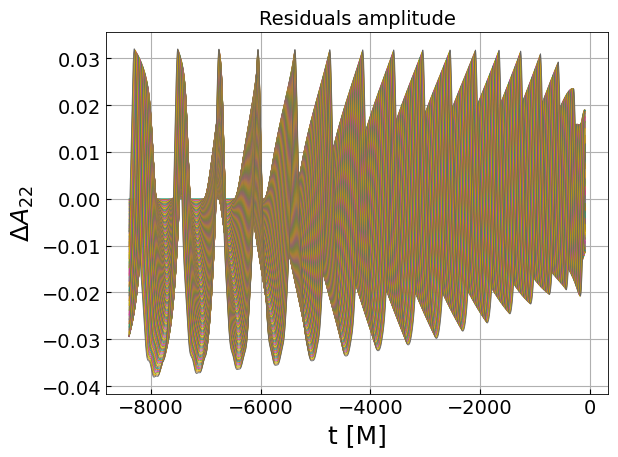

ERROR:tornado.application:Uncaught exception GET /5/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8988', method='GET', uri='/5/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/tornado/websocket.py", line 965, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/matplotlib/backends/backend_webagg.py", line 136, in open
    self.manager.add_web_socket(self)
AttributeError: 'NoneType' object has no attribute 'add_web_socket'


In [ ]:
# --- Simulation settings ---
sampling_frequency = 2048  # or 4096
duration = 4  # seconds
time_array = np.linspace(-duration, 0, int(sampling_frequency * duration))  # time in seconds

# --- Generate training set ---
eccentricities = np.linspace(0.0, 0.3, 200)

gen_dataset = Generate_TrainingSet(time_array=time_array, ecc_ref_parameterspace=eccentricities, mean_ano_parameterspace=[0.0])
dataset_phase = gen_dataset.generate_property_dataset(ecc_list=eccentricities, property="phase", plot_residuals_time_evolv=True, plot_residuals_eccentric_evolv=True, show_legend=False)
dataset_amplitude = gen_dataset.generate_property_dataset(ecc_list=eccentricities, property="amplitude", plot_residuals_time_evolv=True, plot_residuals_eccentric_evolv=True, show_legend=False)    
plt.show()

# Using Mean Anomaly for Efficient Eccentric BBH Surrogates

When building gravitational-wave surrogates for **eccentric binary black holes (BBHs)**, the choice of the independent variable is critical for efficiency. 

---

## 1. Time-domain surrogate approach

If you construct the surrogate in the **time domain**, the waveform amplitude and phase are functions of:


$\Phi(t; e, l_{\rm ref}), \quad A(t; e, l_{\rm ref})$


- `t`: time  
- `e`: eccentricity  
- `l_ref`: reference mean anomaly at the start of the waveform  

This requires a **3D surrogate grid**:


$(t, e, l_{\rm ref}) \longrightarrow \Phi, A$


**Drawbacks**:  
- The waveform varies rapidly near periastron, making the time-domain representation highly non-uniform.  
- Many basis functions are needed to accurately represent the waveform, especially for long signals.

---

## 2. Mean-anomaly-domain surrogate approach

Instead, we can **reparametrize the waveform in terms of mean anomaly** \(l\), which is an orbital parameter that grows linearly (or almost linearly) along the orbit:


$\Phi(l; e)$, $\quad A(l; e)$


- `l`: mean anomaly (0 → 2π per orbit)  
- `e`: eccentricity  

### Advantages:

- The waveform features (like periastron peaks) now occur at approximately the same `l` for all eccentricities.  
- The variations are more **regular**, making surrogate construction more efficient.  
- The surrogate now only requires a **2D grid**:


$(l, e) \longrightarrow \Phi, A$


---

## 3. Handling arbitrary reference mean anomaly

If you want the surrogate to work for an **arbitrary starting mean anomaly \($l_{\rm ref}$\)**:

- In the mean-anomaly domain, this is simply a **shift of the `l` axis**:


$\Phi(l; e, l_{\rm ref}) = \Phi(l + l_{\rm ref}; e)$


- No additional surrogate dimension is needed.  
- This works because **mean anomaly grows linearly**, so shifting it corresponds to a simple phase shift along the orbit.

> **Key insight:** This trick **only works in the mean-anomaly domain**. In the time domain, the motion is non-uniform, so a time shift does not correspond to a simple phase shift, and a 3D surrogate would be required.

---

| Method | Surrogate Dimensions | Pros | Cons |
|--------|--------------------|------|------|
| Time-domain | (t, e, l_ref) | Direct from waveform | Highly non-uniform, many basis functions required |
| Mean-anomaly | (l, e) | Smooth variations, fewer basis functions | Must shift `l` for arbitrary `l_ref`, but easy analytically |

**Conclusion:** Using **mean anomaly** reduces surrogate complexity from 3D → 2D and allows easy handling of arbitrary reference phases.

## 4. Limitations of Analytical Time ↔ Mean Anomaly Mapping for Eccentric BBHs

For a realistic **eccentric binary black hole (BBH) inspiral**, the mapping between **mean anomaly** \(l\) and **physical time** \(t\) is not trivial.

---

### 1. Local mean anomaly per orbit

For the \(i\)-th orbit, the mean anomaly can be defined as:

$l_i(t) = 2\pi \frac{t - t_{i}^P}{P_i}, \quad 0 \le l_i < 2\pi$


- $t_{i}^P$ = time of periastron of the \(i\)-th orbit 
- P_i = t_{i+1}^P - t_{i}^P = orbital period of the \(i\)-th orbit  

Reference: http://arxiv.org/abs/2302.11257

The **global mean anomaly** \(l(t)\) is obtained by concatenating these segments across orbits.

---

### 2. Why the mapping is complicated

- In realistic BBH inspirals:  
  - The **periastron times** \($t_{{\rm peri},i}$\) are **not evenly spaced**.  
  - The **orbital period \(P_i\) shrinks** over time due to gravitational-wave emission.  
  - The **eccentricity decreases** over the inspiral.  

- Therefore, the mapping \(t $\mapsto$ l\) is piecewise and orbit-dependent: 

**This means the relation is non-invertable and can not be reverted back to the time-domain afterwards!**  
**To solve this:** t_target → interpolate t(l) surrogate → find l(t_target) → evaluate waveform surrogate Φ(l), A(l)


---

### 3. Implications for inverting the mapping

- Inverting \(l $\mapsto$ t\) **analytically is not possible** in closed form.  
- To evaluate a waveform at a desired physical time, one must:  
  1. Identify the orbit \(i\) corresponding to the given \(l\) or \(t\).  
  2. Solve numerically for \(t\) using the piecewise linear mapping for that orbit.  
- This is why **even when building a surrogate in mean-anomaly space**, reconstructing the **time-domain waveform requires a numerical inversion or interpolation**.

---

**Key takeaway:**  

- Mean-anomaly surrogates are extremely efficient and smooth.  
- However, mapping back to physical time is inherently **numerical** due to orbital evolution (shrinking period, changing eccentricity).  
- A simple analytical formula for \(t(l)\) only exists for static Keplerian orbits.




## Extracting eccentricity and mean anomaly with `gw_eccentricity`

Reference: http://arxiv.org/abs/2302.11257

In [9]:
from gw_eccentricity import measure_eccentricity
from gw_eccentricity import get_available_methods
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
use_fancy_plotsettings(usetex=False)

In [10]:
help(measure_eccentricity)

Help on function measure_eccentricity in module gw_eccentricity.gw_eccentricity:

measure_eccentricity(tref_in=None, fref_in=None, method='Amplitude', dataDict=None, num_orbits_to_exclude_before_merger=2, precessing=False, frame='inertial', debug_level=0, extra_kwargs=None)
    Measure eccentricity and mean anomaly from a gravitational waveform.
    
    Eccentricity is measured using the GW frequency omega_gw(t) =
    d(phase_gw)/dt. Throughout this documentation, we will refer to phase_gw,
    omega_gw and amp_gw. For nonprecessing systems, these quantities are simply
    the corresponding values of the (2, 2) mode,
    
    amp_gw = amp22, phase_gw = phase22 and omega_gw = omega22.
    
    On the other hand, for precessing systems, we use Eq.(48) and (49) of
    arXiv:1701.00550 to define amp_gw and phase_gw. amp_gw [phase_gw] is
    defined using a symmetric [antisymmetric] combination of
    amplitude [phase] of (2, 2) and (2, -2) mode in the coprecessing frame,
    
    amp_gw =

ERROR:tornado.application:Uncaught exception GET /6/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8988', method='GET', uri='/6/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/tornado/websocket.py", line 965, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/matplotlib/backends/backend_webagg.py", line 136, in open
    self.manager.add_web_socket(self)
AttributeError: 'NoneType' object has no attribute 'add_web_socket'


In [11]:
def get_mean_anomaly_accuracy(gwecc_object, si, hp_ecc, hc_ecc):
    # Get pericenter times from gwecc_object
    tp = gwecc_object.t_pericenters

    # Find nearest index in t_array for each pericenter
    t_peris_idx = [np.argmin(np.abs(si.time - t_i)) for t_i in tp]

    # Corresponding times in t_array
    nearest_times = si.time[t_peris_idx]

    peaks = scipy.signal.find_peaks(si.amplitude(hp_ecc, hc_ecc), height=0.02)

    fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    ax[0].plot(si.time, si.amplitude(hp_ecc, hc_ecc), label='$e_{ref}$ =' + str(si.ecc_ref) + ' Amplitude')
    ax[0].scatter(si.time[peaks[0]], si.amplitude(hp_ecc, hc_ecc)[peaks[0]], s=5, color='red', label='Pericenters from real peaks')
    ax[2].set_xlabel('Time [M]')
    ax[0].set_ylabel('$A$')
    ax[0].legend()
    
    ax[1].plot(si.time, si.amplitude(hp_ecc, hc_ecc), label='$e_{ref}$ =' + str(si.ecc_ref) + ' Amplitude')
    ax[1].scatter(si.time[t_peris_idx], si.amplitude(hp_ecc, hc_ecc)[t_peris_idx], s=5, color='red', label='Pericenters for gw_ecc')
    ax[1].legend()
    ax[1].set_ylabel('$A$')

    # For each pericenter, find nearest peak
    t_pericenters = si.time[t_peris_idx]
    peak_times = si.time[peaks[0]]

    nearest_peaks_idx = np.array([np.argmin(np.abs(peak_times - tp)) for tp in t_pericenters])
    matched_peak_times = peak_times[nearest_peaks_idx]

    # Compute differences
    diffs = matched_peak_times - t_pericenters

    Tp = np.diff(t_pericenters)  # orbital periods
    # Map each diff to its orbit (ignore last pericenter)
    Tp_for_diffs = Tp[:len(diffs)]

    # diffs[:-1] because last orbit is not a complete orbit
    diffs_percentage = diffs[:-1] / Tp_for_diffs * 100

    ax[2].plot(si.time[t_peris_idx][:-1], abs(diffs_percentage))
    ax[2].set_ylabel('$\Delta t$ [%]')

    np.set_printoptions(precision=15, suppress=False)

    fig.savefig('mean_anomaly_accuracy.png', dpi=300)
    plt.show()



<>:43: DeprecationWarning: invalid escape sequence '\D'


/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/phenomxpy/phenomte.py:44: RuntimeWarning: invalid value encountered in power
  return 2.0 * self.xtI(times) ** (3.0 / 2)
/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/polyrat/arnoldi.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i = int(np.argwhere(diff[j] == -1))
/home/suzanne/anaconda3/envs/phenomxpy/lib/python3.10/site-packages/gw_eccentricity/eccDefinition.py:2788: UserWarning: egw(t) is nonmonotonic in the range [np.float64(-7945.874859128007), np.float64(-7784.77633578324)]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,


NEW TIME-DOMAIN after truncate at tmin (in geometric units): [-8401, 0] M
NEW TIME-DOMAIN after truncate at ISCO (in geometric units): [-20302, -11984] M
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_compute_additional_orbits', '_get_phase_bounds', '_get_reference_bounds', '_get_segment_indices', '_plot_debug_segment', '_update_waveform_data_segment', 'amp_gw', 'amp_gw_merger', 'amp_gw_zeroecc', 'amp_gw_zeroecc_interp', 'apocenters_location', 'available_averaging_methods', 'available_omega_gw_extrema_interpolation_methods', 'check_and_raise_zeroecc_data_not_found', 'check_extrema_separation', 'check_if_dropped_too_many_extrema', 'check_if_first_derivative_is_not_strictly_monotonic', 'check_

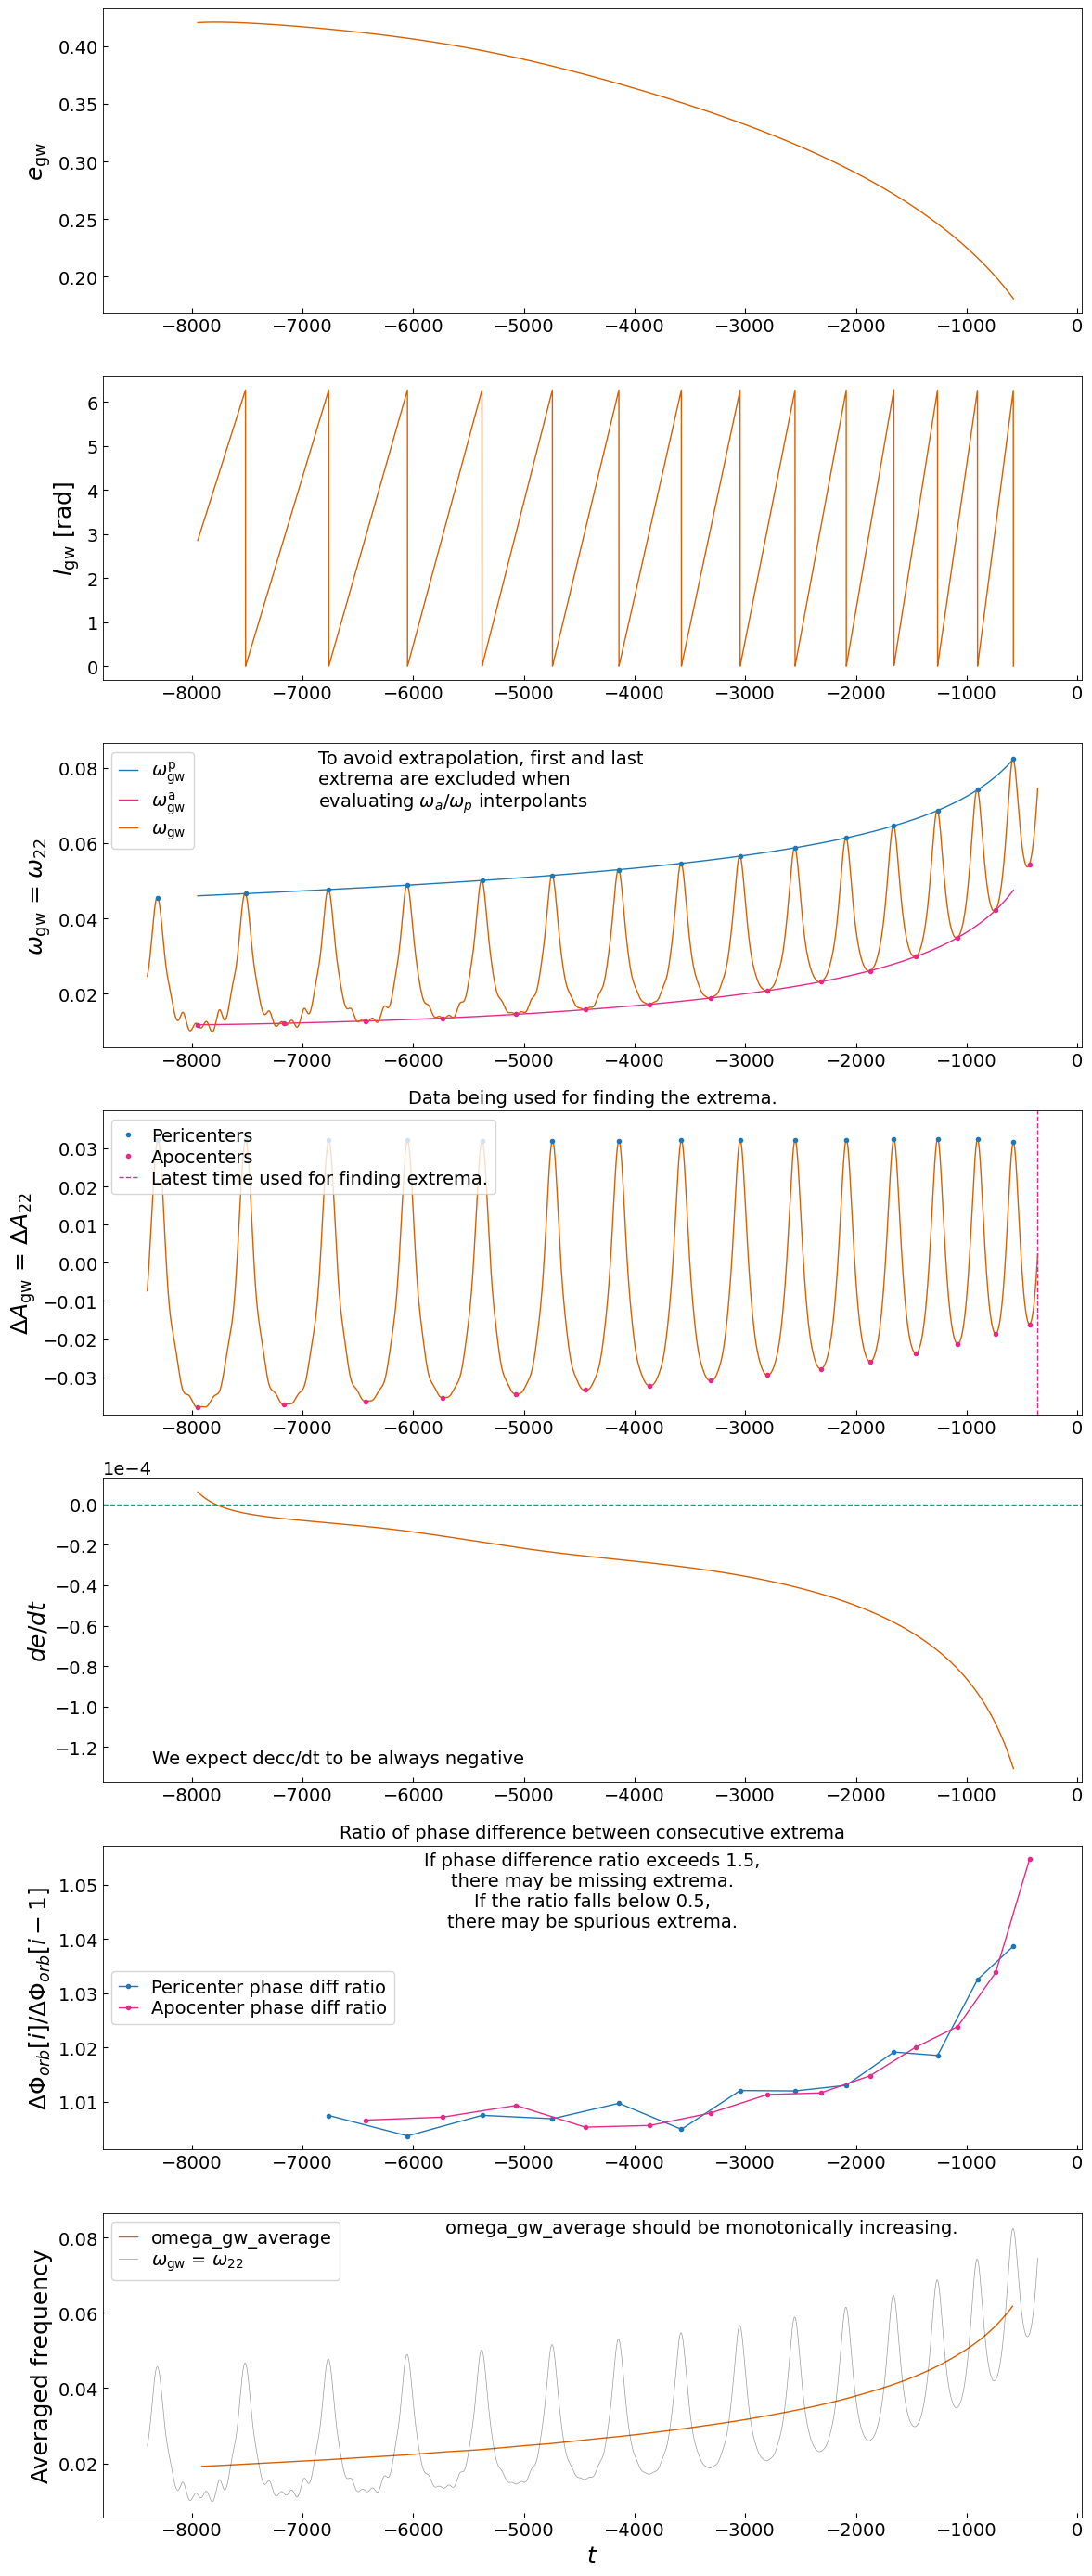

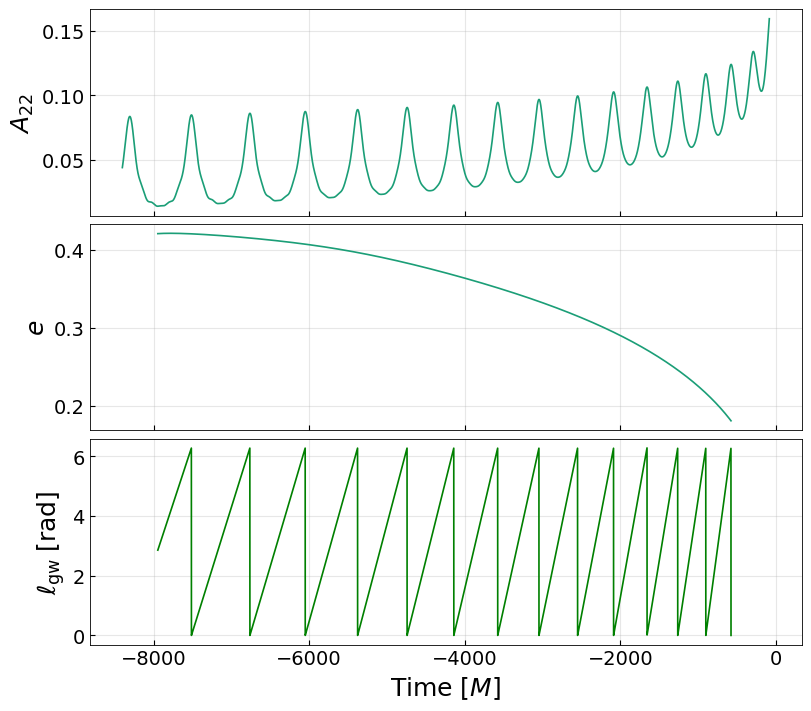

In [12]:
# Calling waveform object 
sampling_frequency = 4096  # or 4096
duration = 6  # seconds
time_array = np.linspace(-duration, 0, int(sampling_frequency * duration))  # time in seconds

eccentricties = [0.3]  # grid of eccentricities
# mean_anos = np.linspace(0, np.pi/2, 50)  # mean anomalies to test
mean_anos = [0]



# phase_0 = si_0.phase(hp_0, hc_0)
# amplitude_0 = si_0.amplitude(hp_0, hc_0)

# phases_res = np.zeros((len(mean_anos), 5000))
# amplitudes_res = np.zeros((len(mean_anos), 5000))

# --- Loop over eccentricities ---
for ecc in eccentricties:
    # Loop over mean anomalies
    for i, mean_ano in enumerate(mean_anos):

        
        wp = Waveform_Properties(time_array=time_array, ecc_ref=ecc, mean_anomaly_ref=mean_ano, total_mass=60, luminosity_distance=200, truncate_at_tmin=True, truncate_at_ISCO=True)
        gwecc_object = wp.get_orbital_parameters(make_diagnostic_plots=True, plot_orbital_parameters=True)
        plt.show()
        # # --- Eccentric waveform ---
        # si = Simulate_Inspiral(time_array=time_array, ecc_ref=ecc, mean_anomaly_ref=mean_ano, total_mass=60, luminosity_distance=200, truncate_at_tmin=True, truncate_at_ISCO=True)

        # # --- Generate actual waveform ---
        # hp_ecc, hc_ecc = si.simulate_inspiral(geometric_units=True, truncate_at_tmin=True, truncate_at_ISCO=True)
        
        # # --- Reference circular waveform ---
        # # si.circulair_wf()
        # # hp_0, hc_0 = si.hp_circ, si.hc_circ

        # h22_ecc = hp_ecc - 1j * hc_ecc
        # # h22_0 = hp_0 - 1j * hc_0

        # # --- Reference circular waveform ---
        # si_0 = Simulate_Inspiral(time_array=time_array, ecc_ref=0, mean_anomaly_ref=mean_ano, total_mass=60, luminosity_distance=200, truncate_at_ISCO=True)
        # hp_0, hc_0= si_0.simulate_inspiral(geometric_units=True, truncate_at_ISCO=True)
        # h22_0 = hp_0 - 1j * hc_0

        # # Setup dataDict (Note the required format)
        # dataDict = {"t": si.time,
        #    "hlm": {(2, 2): h22_ecc},
        #    "t_zeroecc": si_0.time,
        #    "hlm_zeroecc": {(2, 2): h22_0}}
        
        # plt.close('all')

        # # Plot the (2,2) mode amplitudes of the two waveforms
        # fig, ax = plt.subplots(figsize=(12, 3))
        # ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="NR eccentric")
        # ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), label="Surrogate non-eccentric")
        # ax.legend()
        # ax.set_xlabel(r"$t$")
        # ax.set_ylabel(r"$A_{22}$")

        # # Let's consider an example using ResidualAmplitude to measure eccentricity at a single time
        # methods = [
        # "Amplitude",
        # "Frequency",
        # "ResidualAmplitude",
        # "ResidualFrequency",
        # "AmplitudeFits",
        # "FrequencyFits"]
    
        # # Loop only over indices 0, 2, 4
        # for i in [4]:
        #     method = methods[i]
        #     print(method)
            
        #     tref_in = si.time
        #     return_dict = measure_eccentricity(tref_in=tref_in,
        #                                     method=method,
        #                                     dataDict=dataDict)
        #     gwecc_object = return_dict["gwecc_object"]
        #     # fig, ax = gwecc_object.make_diagnostic_plots()

        #     eccentricity = return_dict["eccentricity"]
        #     mean_anomaly = return_dict["mean_anomaly"]
        #     gwecc_object = return_dict["gwecc_object"]

        #     get_mean_anomaly_accuracy(gwecc_object, si, hp_ecc, hc_ecc)


In [13]:
import numpy as np
from scipy.constants import G, c
import lal  # only for MSUN_SI

def r_isco_kerr(chi):
    """ISCO radius in units of total mass M."""
    Z1 = 1 + (1 - chi**2)**(1/3) * ((1 + chi)**(1/3) + (1 - chi)**(1/3))
    Z2 = np.sqrt(3 * chi**2 + Z1**2)
    r_isco = 3 + Z2 - np.sign(chi) * np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2))
    return r_isco

def f_isco(m1_solar, m2_solar, chi1, chi2):
    """Gravitational-wave ISCO frequency (Hz) for aligned-spin binary."""
    # Convert masses to kg
    m1 = m1_solar * lal.MSUN_SI
    m2 = m2_solar * lal.MSUN_SI
    M_tot = m1 + m2

    # Effective spin
    chi_eff = (m1_solar*chi1 + m2_solar*chi2)/(m1_solar + m2_solar)

    # ISCO radius in meters
    r_isco = r_isco_kerr(chi_eff) * (G * M_tot / c**2)

    # Orbital frequency (rad/s)
    omega = np.sqrt(G * M_tot / r_isco**3)

    # Gravitational-wave frequency (Hz)
    f_gw = omega / np.pi
    return f_gw

# Example
m1 = 0.25
m2 = 0.5
chi1 = 0.05
chi2 = 0.05

f = f_isco(m1, m2, chi1, chi2)
print(f"f_ISCO = {f:.2f} Hz")


f_ISCO = 6112.23 Hz
